In [1]:
import pandas as pd
names=('age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,'
       'hours-per-week,native-country,income').split(',')
data=pd.read_csv('adult.data',names=names)
col_names=data.columns.tolist()

In [2]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
nameList=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for n in nameList:
    print('按',n,'分组,计数并排序显示取值题目')
    print(data.groupby(n).size().sort_values(ascending=False))
    print()

按 workclass 分组,计数并排序显示取值题目
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

按 education 分组,计数并排序显示取值题目
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

按 marital-status 分组,计数并排序显示取值题目
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

按 

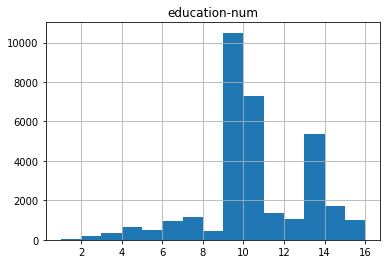

In [6]:
#绘制教育年限直方图
import matplotlib.pyplot as plt
data.hist(column='education-num',bins=15)
plt.show()

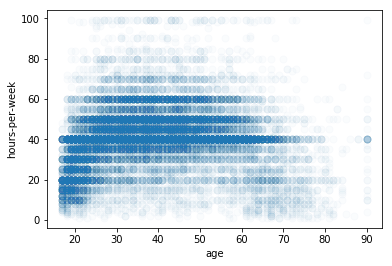

In [7]:
#以年龄为横坐标 周平均工作的时长为从坐标绘制散点图
data.plot(x='age',y='hours-per-week',kind='scatter',alpha=0.02,s=50)
plt.show()

In [8]:
#将样本数据按照收入水平分组 并计算各组样本
data.groupby('income')['income'].count()

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [9]:
import numpy as np
np.mean(data['income']==' >50K')

0.24080955744602439

In [11]:
#将收入不超过50K的数据保存到low_income 高于50k的保存到数据 high_income
low_income=data[data['income']==" <=50K"]
high_income=data[data['income']==" >50K"]

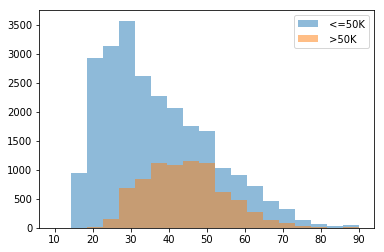

In [12]:
#绘制 对比不同收入水平的年龄分布情况
bins=np.linspace(10,90,20)
plt.hist(low_income['age'].values,bins=bins,alpha=0.5,label=' <=50K')

plt.hist(high_income['age'].values,bins=bins,alpha=0.5,label=' >50K')

plt.legend(loc='best')  #添加变量标注声明 
plt.show()

In [13]:
#构建模型
target=data['income']
features_data=data.drop('income',axis=1)

In [14]:
numeric_features=[c for c in features_data if features_data[c].dtype.kind in ('i','f')]
print(numeric_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [15]:
numeric_data=features_data[numeric_features]
print(numeric_data.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40


In [16]:
categorical_data=features_data.drop(numeric_features,1)
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [17]:
print(pd.factorize(['a','b','c','a']))
categorical_data_encoded=categorical_data.apply(lambda x:pd.factorize(x)[0])
categorical_data_encoded.head()

(array([0, 1, 2, 0], dtype=int64), array(['a', 'b', 'c'], dtype=object))


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,2,0,0,0,0
3,2,2,1,2,1,1,0,0
4,2,0,1,3,2,1,1,1


In [18]:
features=pd.concat([numeric_data,categorical_data_encoded],axis=1)
features.head()

X=features.values.astype(np.float32)
y=(target.values==' >50K').astype(np.int32)

In [20]:
print(X[0:1])
print(y[0:1])
print(len(X))

[[  3.90000000e+01   7.75160000e+04   1.30000000e+01   2.17400000e+03
    0.00000000e+00   4.00000000e+01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
[0]
32561


In [21]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

clf=DecisionTreeClassifier(max_depth=10)

scores=cross_val_score(clf,X_train,y_train,cv=5,scoring='roc_auc')
print('ROC AUC DECISION TREE',np.mean(scores),'+/-',np.std(scores))

ROC AUC DECISION TREE 0.894015723424 +/- 0.0057782580551


In [24]:
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
print(predict[0:10])
print(y_test)

[0 0 0 0 1 1 0 0 0 0]
[0 0 0 ..., 1 0 1]


In [25]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90      4918
          1       0.71      0.66      0.69      1595

avg / total       0.85      0.85      0.85      6513

